In [4]:
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy import signal

In [71]:
PIT = 1  # Process Time
Fs = 10e3  # Sampling Freq
phase_offset = 1/3
Freq = 5  # Jammer Freq
NumSamples = PIT * Fs  # Number of samples to process
t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
f = np.arange(0, NumSamples - 1, 1) / PIT  # Frequency Samples
CWa = 1 * np.exp(2j * np.pi * Freq * t)  # Simulate a complex sin signal with frequency of 500
CWb = 1 * np.exp(2j * (np.pi * Freq * t+1/2*phase_offset*np.pi)) # Simulate a complex sin signal with frequency of 500

In [72]:
var = 1
sig_a = CWa# + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) 
sig_b = CWb# + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) ## Adding noise to the CW signal with Variance of var

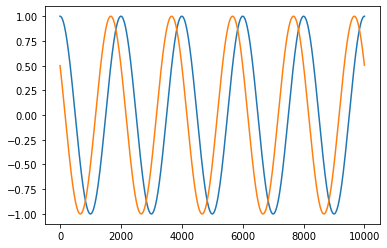

In [73]:

plt.plot(sig_a.real)
plt.plot(sig_b.real)

# plt.xlim([0,200])

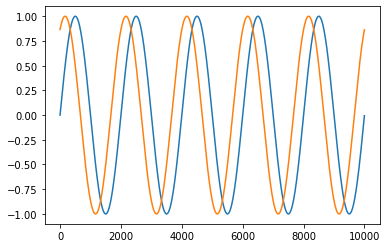

In [74]:

plt.plot(sig_a.imag)
plt.plot(sig_b.imag)

In [75]:
# zero pad
zeros = [0 for i in range(len(CWa)+len(CWb)-1)]
sig_a = np.append(sig_a, zeros)
sig_b = np.append(sig_b, zeros)

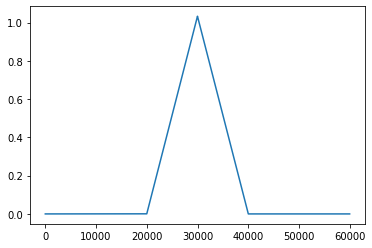

In [76]:
# Try scipy out
corr = signal.correlate(sig_a, sig_b)

corr /= np.max(corr)

plt.plot(np.abs(corr))

In [77]:
fft_a = fft.fft(sig_a)
fft_b = (fft.fft(np.conj(sig_b)))
# half_a = 2/len(fft_a)*fft_a[:len(fft_a)//2]
# half_b = 2/len(fft_b)*fft_b[:len(fft_b)//2]
# norm_fft_a = np.append(half_a, np.flip(half_a))
# norm_fft_b = np.append(half_b, np.flip(half_b))
# plt.plot(norm_fft_b)
# plt.xlim([150,250])

double_fft = norm_fft_a * norm_fft_b
inv_fft = np.fft.ifft(double_fft)
plt.plot((inv_fft.real))

In [78]:
double_fft = fft_a*fft_b
# half = double_fft[:len(double_fft)//2]
# flipped = np.append(half, np.flip(half))
inv_fft = np.fft.ifft(double_fft)
shifted_res = np.fft.fftshift(inv_fft)

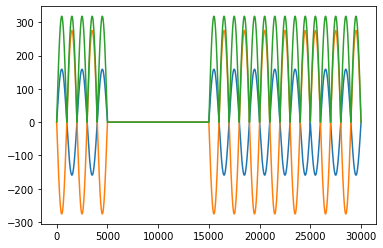

In [81]:
plt.figure()
plt.plot(shifted_res.real)
plt.plot(shifted_res.imag)
plt.plot(abs(shifted_res))
# plt.xticks(np.arange(-int(len(inv_fft)/2), int(len(inv_fft)/2+1)))
plt.show()

In [80]:
x_axis = np.arange(-int(len(shifted_res)/2), int(len(shifted_res)/2+1))
x_axis[np.argmax(abs(shifted_res))]

499

In [48]:
N = 10
t = np.arange(N) / N
f = 3
sig = np.cos(2*np.pi*f*t)

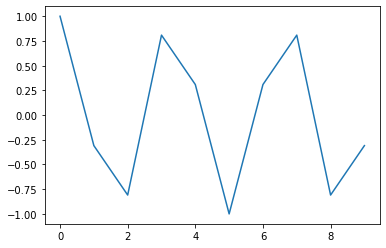

In [49]:
plt.plot(sig)

/home/edmond/Documents/venv/development/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


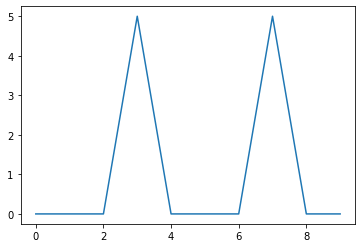

In [52]:
plt.plot(np.fft.fft(sig))